In [7]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [8]:
XCr_path

'/global/cscratch1/sd/krzywins/CrystalBPM5/crystal-fft-bpm/examples/../'

In [9]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Si44417keVConstanStrainGradient.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

def single_realization_with_data(delta_theta):
    
    xcr = XCrystal(XCr_path+'/config/Si44417keVConstanStrainGradient.yaml')
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [10]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(-20e-6)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Delta theta:  -2e-05 ; Reflectivity:  0.40906480817139507 ; Transmission:  0.12744571037328256


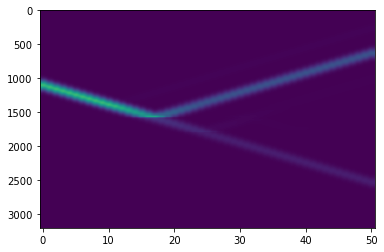

In [11]:
plt.imshow(np.abs(U1_xyz[0,:,1,:]**2 + U2_xyz[0,:,1,:]**2), aspect='auto')